In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
%matplotlib inline

In [2]:
pd.options.plotting.backend = "plotly"

# reading the dataset

In [3]:
df1 = pd.read_excel("/home/kala/anaconda3/envs/Intro_to_TimeSeries_Forecasting/prayagraj data/Prayagraj Data Processing Jul-2023 to Mar-2024_hourly_cal.xlsx")

In [4]:
df1['Timestamp'] = pd.to_datetime(df1.Timestamp ,errors='coerce')
df1 = df1.set_index('Timestamp')

In [5]:
df1.head()

Totalizer1  Condensate Total  Direct Steam  \
Timestamp                                                             
2023-07-01 00:00:58.752     9422.28            4460.0        1677.0   
2023-07-01 01:00:59.040     8049.92            2840.0        2931.0   
2023-07-01 02:00:59.328     8020.96            4150.0        2543.0   
2023-07-01 03:00:58.752     5178.94            2460.0        1966.0   
2023-07-01 04:00:59.040     6773.44            2930.0        1510.0   

                         Indirect Steam  Direct(%)  Indirect(%)        CRF  \
Timestamp                                                                    
2023-07-01 00:00:58.752         7745.28  17.798240    82.201760  47.334615   
2023-07-01 01:00:59.040         5118.92  36.410300    63.589700  35.279854   
2023-07-01 02:00:59.328         5477.96  31.704434    68.295566  51.739443   
2023-07-01 03:00:58.752         3212.94  37.961436    62.038564  47.500068   
2023-07-01 04:00:59.040         5263.44  22.292956    77.707044  43.257193   

                         Gap  Pump1 Total  Pump2 Total  ...  \
Timestamp                                               ...   
2023-07-01 00:00:58.752  NaN       3330.0       1080.0  ...   
2023-07-01 01:00:59.040  NaN       1980.0        720.0  ...   
2023-07-01 02:00:59.328  NaN       2940.0       1110.0  ...   
2023-07-01 03:00:58.752  NaN       1260.0       1050.0  ...   
2023-07-01 04:00:59.040  NaN       1770.0       1050.0  ...   

                         FJP Motive Steam Pressure  FJP Condensate Pressure  \
Timestamp                                                                     
2023-07-01 00:00:58.752                   3.346667                 0.443333   
2023-07-01 01:00:59.040                   3.278333                 0.398333   
2023-07-01 02:00:59.328                   3.348333                 0.420000   
2023-07-01 03:00:58.752                   3.400000                 0.400000   
2023-07-01 04:00:59.040                   3.400000                 0.400000   

                         FJP Flash Steam pressure  FJP Over Flow Temperature  \
Timestamp                                                                      
2023-07-01 00:00:58.752                       0.0                  43.218333   
2023-07-01 01:00:59.040                       0.0                  49.876667   
2023-07-01 02:00:59.328                       0.0                  61.096667   
2023-07-01 03:00:58.752                       0.0                  61.200000   
2023-07-01 04:00:59.040                       0.0                  61.200000   

                         Flash Motive Pressure  Flash Steam Pressure  \
Timestamp                                                              
2023-07-01 00:00:58.752               0.443333                   0.0   
2023-07-01 01:00:59.040               0.398333                   0.0   
2023-07-01 02:00:59.328               0.420000                   0.0   
2023-07-01 03:00:58.752               0.400000                   0.0   
2023-07-01 04:00:59.040               0.400000                   0.0   

                         HRU INLET Temperature  HRU OUTLET Temperature  \
Timestamp                                                                
2023-07-01 00:00:58.752              76.878333              107.743333   
2023-07-01 01:00:59.040              77.540000              106.131667   
2023-07-01 02:00:59.328              80.585000              108.033333   
2023-07-01 03:00:58.752              76.585000              111.983333   
2023-07-01 04:00:59.040              88.063333              114.953333   

                         PRS Inlet Pressure  Steam Header Pressure  
Timestamp                                                           
2023-07-01 00:00:58.752           12.103333               2.356667  
2023-07-01 01:00:59.040           12.121667               3.468333  
2023-07-01 02:00:59.328           12.300000               3.600000  
2023-07-01 03:00:58.752           12.300000           

In [6]:
df2=pd.read_excel("/home/kala/Downloads/Prayagraj-Data Processing & Analytics(Jan -Jun 2023).xlsx",sheet_name='Hourly Data')

In [7]:
df2['Timestamp'] = pd.to_datetime(df2.Timestamp ,errors='coerce')
df2 = df2.set_index('Timestamp')

In [8]:
df2.index[-150]
df2.index[-1]

Timestamp('2023-07-07 17:00:59.328000')

In [9]:
df2 = df2.iloc[:-149]

In [10]:
df1=df1.drop(columns=['Gap',
'Flash Motive Pressure',
'Flash Steam Pressure'])

In [11]:
df1 = df1.sort_index(axis=1)

In [12]:
df2=df2.drop(columns=['Gap In Indirect Vs CRF',
'Drum Consumption'])

In [13]:
df2 = df2.sort_index(axis=1)

In [14]:
result = pd.concat([df2, df1])
result

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total  \
Timestamp                                                                         
2023-01-01 00:00:58.752                                                0.0        
2023-01-01 01:00:59.040                                                0.0        
2023-01-01 02:00:59.328                                                0.0        
2023-01-01 03:00:58.752                                                0.0        
2023-01-01 04:00:59.040                                                0.0        
...                                                                    ...        
2023-10-19 05:00:59.328                                              884.0        
2023-10-19 06:00:58.752                                             1288.0        
2023-10-19 07:00:59.040                                             1253.0        
2023-10-19 08:00:59.328                                              772.0        
2023-10-19 09:00:58.752                                              205.0        

                         ( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total  \
Timestamp                                                                                       
2023-01-01 00:00:58.752                                                0.0                      
2023-01-01 01:00:59.040                                                0.0                      
2023-01-01 02:00:59.328                                                0.0                      
2023-01-01 03:00:58.752                                                0.0                      
2023-01-01 04:00:59.040                                                0.0                      
...                                                                    ...                      
2023-10-19 05:00:59.328                                             1891.0                      
2023-10-19 06:00:58.752                                             1842.0                      
2023-10-19 07:00:59.040                                             1662.0                      
2023-10-19 08:00:59.328                                             1113.0                      
2023-10-19 09:00:58.752                                              552.0                      

                               CRF  Colour Kitchen Steam Total  \
Timestamp                                                        
2023-01-01 00:00:58.752    #DIV/0!                         0.0   
2023-01-01 01:00:59.040    #DIV/0!                         0.0   
2023-01-01 02:00:59.328    #DIV/0!                         0.0   
2023-01-01 03:00:58.752    #DIV/0!                         0.0   
2023-01-01 04:00:59.040    #DIV/0!                         0.0   
...                            ...                         ...   
2023-10-19 05:00:59.328  41.542336                       210.0   
2023-10-19 06:00:58.752  55.644062                       208.0   
2023-10-19 07:00:59.040  54.783372                       205.0   
2023-10-19 08:00:59.328  41.328636                       193.0   
2023-10-19 09:00:58.752  36.028494                       123.0   

                         Condensate Total  Direct Steam  Direct(%)  \
Timestamp                                                            
2023-01-01 00:00:58.752               0.0           NaN        NaN   
2023-01-01 01:00:59.040               0.0           NaN        NaN   
2023-01-01 02:00:59.328               0.0           NaN        NaN   
2023-01-01 03:00:58.752               0.0           NaN        NaN   
2023-01-01 04:00:59.040               0.0           NaN        NaN   
...                                   ...           ...        ...   
2023-10-19 05:00:59.328            2428.0        2643.0  45.220920   
2023-10-19 06:00:58.752            4352.0        2228.0  28.486896   
2023-10-19 07:00:59.040            3608.0        1787.0  27.133560   
2023-10-19 08:00:59.328            1864.0        1532.

In [15]:
result[['Totalizer1','CRF','Feed water Temp','PPPPU 1 Overflow Temperature']].isna().sum()

Totalizer1                      109
CRF                             624
Feed water Temp                 827
PPPPU 1 Overflow Temperature    200
dtype: int64

In [16]:
result = result.apply(lambda col: pd.to_numeric(col, downcast='float', errors='coerce'))

In [17]:
result

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total  \
Timestamp                                                                         
2023-01-01 00:00:58.752                                                0.0        
2023-01-01 01:00:59.040                                                0.0        
2023-01-01 02:00:59.328                                                0.0        
2023-01-01 03:00:58.752                                                0.0        
2023-01-01 04:00:59.040                                                0.0        
...                                                                    ...        
2023-10-19 05:00:59.328                                              884.0        
2023-10-19 06:00:58.752                                             1288.0        
2023-10-19 07:00:59.040                                             1253.0        
2023-10-19 08:00:59.328                                              772.0        
2023-10-19 09:00:58.752                                              205.0        

                         ( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total  \
Timestamp                                                                                       
2023-01-01 00:00:58.752                                                0.0                      
2023-01-01 01:00:59.040                                                0.0                      
2023-01-01 02:00:59.328                                                0.0                      
2023-01-01 03:00:58.752                                                0.0                      
2023-01-01 04:00:59.040                                                0.0                      
...                                                                    ...                      
2023-10-19 05:00:59.328                                             1891.0                      
2023-10-19 06:00:58.752                                             1842.0                      
2023-10-19 07:00:59.040                                             1662.0                      
2023-10-19 08:00:59.328                                             1113.0                      
2023-10-19 09:00:58.752                                              552.0                      

                               CRF  Colour Kitchen Steam Total  \
Timestamp                                                        
2023-01-01 00:00:58.752        NaN                         0.0   
2023-01-01 01:00:59.040        NaN                         0.0   
2023-01-01 02:00:59.328        NaN                         0.0   
2023-01-01 03:00:58.752        NaN                         0.0   
2023-01-01 04:00:59.040        NaN                         0.0   
...                            ...                         ...   
2023-10-19 05:00:59.328  41.542336                       210.0   
2023-10-19 06:00:58.752  55.644062                       208.0   
2023-10-19 07:00:59.040  54.783371                       205.0   
2023-10-19 08:00:59.328  41.328636                       193.0   
2023-10-19 09:00:58.752  36.028496                       123.0   

                         Condensate Total  Direct Steam  Direct(%)  \
Timestamp                                                            
2023-01-01 00:00:58.752               0.0           NaN        NaN   
2023-01-01 01:00:59.040               0.0           NaN        NaN   
2023-01-01 02:00:59.328               0.0           NaN        NaN   
2023-01-01 03:00:58.752               0.0           NaN        NaN   
2023-01-01 04:00:59.040               0.0           NaN        NaN   
...                                   ...           ...        ...   
2023-10-19 05:00:59.328            2428.0        2643.0  45.220920   
2023-10-19 06:00:58.752            4352.0        2228.0  28.486896   
2023-10-19 07:00:59.040            3608.0        1787.0  27.133560   
2023-10-19 08:00:59.328            1864.0        1532.

In [18]:
result.dropna(subset=['Totalizer1','CRF','Feed water Temp','PPPPU 1 Overflow Temperature'],inplace=True)
result.isna().sum()

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total                     4
( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total       4
CRF                                                                        0
Colour Kitchen Steam Total                                                 5
Condensate Total                                                           0
Direct Steam                                                            2614
Direct(%)                                                               2608
FJP Condensate Pressure                                                    0
FJP Flash Steam pressure                                                  95
FJP Motive Steam Pressure                                                  0
FJP Over Flow Temperature                                                  3
Feed water Temp                                                            0
HRU INLET Temperature                                                      0

In [19]:
df_filter=result.loc[(result["CRF"]<=100)]

In [20]:
df_filter

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total  \
Timestamp                                                                         
2023-01-02 11:00:59.328                                             1092.0        
2023-01-02 12:00:58.752                                             1463.0        
2023-01-02 13:00:59.040                                             1655.0        
2023-01-02 15:00:58.752                                              604.0        
2023-01-02 16:00:59.040                                             1116.0        
...                                                                    ...        
2023-10-19 05:00:59.328                                              884.0        
2023-10-19 06:00:58.752                                             1288.0        
2023-10-19 07:00:59.040                                             1253.0        
2023-10-19 08:00:59.328                                              772.0        
2023-10-19 09:00:58.752                                              205.0        

                         ( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total  \
Timestamp                                                                                       
2023-01-02 11:00:59.328                                             2354.0                      
2023-01-02 12:00:58.752                                             3098.0                      
2023-01-02 13:00:59.040                                             2562.0                      
2023-01-02 15:00:58.752                                             1180.0                      
2023-01-02 16:00:59.040                                             2336.0                      
...                                                                    ...                      
2023-10-19 05:00:59.328                                             1891.0                      
2023-10-19 06:00:58.752                                             1842.0                      
2023-10-19 07:00:59.040                                             1662.0                      
2023-10-19 08:00:59.328                                             1113.0                      
2023-10-19 09:00:58.752                                              552.0                      

                               CRF  Colour Kitchen Steam Total  \
Timestamp                                                        
2023-01-02 11:00:59.328  22.177549                         0.0   
2023-01-02 12:00:58.752  20.264565                         0.0   
2023-01-02 13:00:59.040  31.597685                         0.0   
2023-01-02 15:00:58.752  52.383381                         0.0   
2023-01-02 16:00:59.040  22.708479                         0.0   
...                            ...                         ...   
2023-10-19 05:00:59.328  41.542336                       210.0   
2023-10-19 06:00:58.752  55.644062                       208.0   
2023-10-19 07:00:59.040  54.783371                       205.0   
2023-10-19 08:00:59.328  41.328636                       193.0   
2023-10-19 09:00:58.752  36.028496                       123.0   

                         Condensate Total  Direct Steam  Direct(%)  \
Timestamp                                                            
2023-01-02 11:00:59.328            3420.0           NaN        NaN   
2023-01-02 12:00:58.752            3600.0           NaN        NaN   
2023-01-02 13:00:59.040            4260.0           NaN        NaN   
2023-01-02 15:00:58.752            4110.0           NaN        NaN   
2023-01-02 16:00:59.040            3570.0           NaN        NaN   
...                                   ...           ...        ...   
2023-10-19 05:00:59.328            2428.0        2643.0  45.220920   
2023-10-19 06:00:58.752            4352.0        2228.0  28.486896   
2023-10-19 07:00:59.040            3608.0        1787.0  27.133560   
2023-10-19 08:00:59.328            1864.0        1532.

In [21]:
df_filter.describe()

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total  \
count                                       5.537000e+03        
mean                                        4.182464e+03        
std                                         5.668917e+05        
min                                        -7.718689e+06        
25%                                         6.470000e+02        
50%                                         1.097000e+03        
75%                                         1.464000e+03        
max                                         7.767983e+06        

       ( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total  \
count                                       5.537000e+03                      
mean                                        7.518831e+03                      
std                                         9.789207e+05                      
min                                        -1.190545e+07                      
25%                                         4.280000e+02                      
50%                                         1.428000e+03                      
75%                                         2.195000e+03                      
max                                         1.199108e+07                      

               CRF  Colour Kitchen Steam Total  Condensate Total  \
count  5541.000000                 5536.000000       5541.000000   
mean     51.852013                  285.585632       4052.473877   
std      10.870839                25267.046875       2053.638428   
min      -4.578856              -613448.000000         10.000000   
25%      46.080612                    0.000000       3140.000000   
50%      52.362339                    0.000000       4080.000000   
75%      58.188931                  205.000000       4920.000000   
max     100.000000               623554.000000      57990.000000   

       Direct Steam      Direct(%)  FJP Condensate Pressure  \
count  2.928000e+03    2934.000000              5541.000000   
mean   1.200298e+04     147.310426                93.145103   
std    6.877521e+05    8965.648728               378.703400   
min   -1.286391e+07 -203213.382400                 0.000000   
25%    2.084000e+03      29.072121                 0.343333   
50%    2.635500e+03      34.419257                 0.503333   
75%    3.154250e+03      40.638949                 3.358333   
max    1.287080e+07  164559.439648              1700.000000   

       FJP Flash Steam pressure  FJP Motive Steam Pressure  ...   Pump4 TEMP  \
count               5446.000000                5541.000000  ...  4888.000000   
mean                   5.158418                  15.369961  ...    48.697319   
std                   86.164139                 140.153763  ...    14.199279   
min                    0.000000                   0.000000  ...     0.000000   
25%                    0.000000                   0.400000  ...    37.244404   
50%                    0.000000                   3.255000  ...    46.585274   
75%                    0.000000                   3.453333  ...    58.457432   
max                 1600.000000                1600.000000  ...    84.794434   

       Pump4 Total    Pump5 TEMP  Pump5 Total   Steam Flow Rate  \
count   4839.000000  4888.000000   4894.000000      5541.000000   
mean      19.231247    75.984375     68.583977      7557.166034   
std       26.144506     9.971853     42.198196      2002.809523   
min        0.000000    28.855881      0.000000         0.000000   
25%        0.000000    75.055466     50.000000      6202.534500   
50%       10.000000    79.759766     70.000000      7760.610500   
75%       30.000000    81.768044     80.000000      8936.944000   
max      370.000000    91.604362    990.000000     17280.083330   

       Steam Header Pressure    Totalizer1  Washing Machine 1 Steam Total  \
count            5541.000000  5.541000e+03                   5.539000e+03   
mean               55.369015  7.888234e+03       

In [22]:
df_filter=df_filter.loc[(df_filter["Direct(%)"]<=100)&(df_filter["Direct(%)"]>=0)]

In [23]:
df_filter.head()

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total  \
Timestamp                                                                         
2023-05-26 10:00:59.040                                                7.0        
2023-05-26 11:00:59.328                                              143.0        
2023-05-26 12:00:58.752                                              587.0        
2023-05-26 13:00:59.040                                             1170.0        
2023-05-26 14:00:59.328                                             1464.0        

                         ( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total  \
Timestamp                                                                                       
2023-05-26 10:00:59.040                                                0.0                      
2023-05-26 11:00:59.328                                                0.0                      
2023-05-26 12:00:58.752                                                0.0                      
2023-05-26 13:00:59.040                                                0.0                      
2023-05-26 14:00:59.328                                                0.0                      

                               CRF  Colour Kitchen Steam Total  \
Timestamp                                                        
2023-05-26 10:00:59.040  59.726036                         0.0   
2023-05-26 11:00:59.328  65.952415                         0.0   
2023-05-26 12:00:58.752  52.612370                         0.0   
2023-05-26 13:00:59.040  56.342850                         0.0   
2023-05-26 14:00:59.328  58.110397                         0.0   

                         Condensate Total  Direct Steam  Direct(%)  \
Timestamp                                                            
2023-05-26 10:00:59.040            2380.0        2636.0  66.150348   
2023-05-26 11:00:59.328            3630.0        2240.0  40.697911   
2023-05-26 12:00:58.752            4090.0        2193.0  28.210006   
2023-05-26 13:00:59.040            5060.0        3163.0  35.219848   
2023-05-26 14:00:59.328            4340.0        2849.0  38.146665   

                         FJP Condensate Pressure  FJP Flash Steam pressure  \
Timestamp                                                                    
2023-05-26 10:00:59.040                 0.386667                  0.003333   
2023-05-26 11:00:59.328                 0.286667                  0.000000   
2023-05-26 12:00:58.752                 0.376667                  0.000000   
2023-05-26 13:00:59.040                 0.390000                  0.001667   
2023-05-26 14:00:59.328                 0.396667                  0.000000   

                         FJP Motive Steam Pressure  ...  Pump4 TEMP  \
Timestamp                                           ...               
2023-05-26 10:00:59.040                   3.470000  ...   34.639645   
2023-05-26 11:00:59.328                   3.536667  ...   48.104519   
2023-05-26 12:00:58.752                   3.505000  ...   51.512917   
2023-05-26 13:00:59.040                   3.411667  ...   52.034580   
2023-05-26 14:00:59.328                   3.581667  ...   57.482250   

                         Pump4 Total   Pump5 TEMP  Pump5 Total   \
Timestamp                                                         
2023-05-26 10:00:59.040          20.0   78.500076         110.0   
2023-05-26 11:00:59.328           0.0   80.929504          60.0   
2023-05-26 12:00:58.752          10.0   78.822380          60.0   
2023-05-26 13:00:59.040          10.0   79.822815          70.0   
2023-05-26 14:00:59.328           0.0   80.929321          80.0   

                         Steam Flow Rate  Steam Header Pressure   Totalizer1  \
Timestamp                                                                      
2023-05-26 10:00:59.040      4098.019833               3.305000  3984.861880   
2023-05-26 11:00:59.328      5524.688067              

In [24]:
df_filter=df_filter.loc[(df_filter["Totalizer1"]<=12000)]

In [25]:
df_filter.head()

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total  \
Timestamp                                                                         
2023-05-26 10:00:59.040                                                7.0        
2023-05-26 11:00:59.328                                              143.0        
2023-05-26 12:00:58.752                                              587.0        
2023-05-26 13:00:59.040                                             1170.0        
2023-05-26 14:00:59.328                                             1464.0        

                         ( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total  \
Timestamp                                                                                       
2023-05-26 10:00:59.040                                                0.0                      
2023-05-26 11:00:59.328                                                0.0                      
2023-05-26 12:00:58.752                                                0.0                      
2023-05-26 13:00:59.040                                                0.0                      
2023-05-26 14:00:59.328                                                0.0                      

                               CRF  Colour Kitchen Steam Total  \
Timestamp                                                        
2023-05-26 10:00:59.040  59.726036                         0.0   
2023-05-26 11:00:59.328  65.952415                         0.0   
2023-05-26 12:00:58.752  52.612370                         0.0   
2023-05-26 13:00:59.040  56.342850                         0.0   
2023-05-26 14:00:59.328  58.110397                         0.0   

                         Condensate Total  Direct Steam  Direct(%)  \
Timestamp                                                            
2023-05-26 10:00:59.040            2380.0        2636.0  66.150348   
2023-05-26 11:00:59.328            3630.0        2240.0  40.697911   
2023-05-26 12:00:58.752            4090.0        2193.0  28.210006   
2023-05-26 13:00:59.040            5060.0        3163.0  35.219848   
2023-05-26 14:00:59.328            4340.0        2849.0  38.146665   

                         FJP Condensate Pressure  FJP Flash Steam pressure  \
Timestamp                                                                    
2023-05-26 10:00:59.040                 0.386667                  0.003333   
2023-05-26 11:00:59.328                 0.286667                  0.000000   
2023-05-26 12:00:58.752                 0.376667                  0.000000   
2023-05-26 13:00:59.040                 0.390000                  0.001667   
2023-05-26 14:00:59.328                 0.396667                  0.000000   

                         FJP Motive Steam Pressure  ...  Pump4 TEMP  \
Timestamp                                           ...               
2023-05-26 10:00:59.040                   3.470000  ...   34.639645   
2023-05-26 11:00:59.328                   3.536667  ...   48.104519   
2023-05-26 12:00:58.752                   3.505000  ...   51.512917   
2023-05-26 13:00:59.040                   3.411667  ...   52.034580   
2023-05-26 14:00:59.328                   3.581667  ...   57.482250   

                         Pump4 Total   Pump5 TEMP  Pump5 Total   \
Timestamp                                                         
2023-05-26 10:00:59.040          20.0   78.500076         110.0   
2023-05-26 11:00:59.328           0.0   80.929504          60.0   
2023-05-26 12:00:58.752          10.0   78.822380          60.0   
2023-05-26 13:00:59.040          10.0   79.822815          70.0   
2023-05-26 14:00:59.328           0.0   80.929321          80.0   

                         Steam Flow Rate  Steam Header Pressure   Totalizer1  \
Timestamp                                                                      
2023-05-26 10:00:59.040      4098.019833               3.305000  3984.861880   
2023-05-26 11:00:59.328      5524.688067              

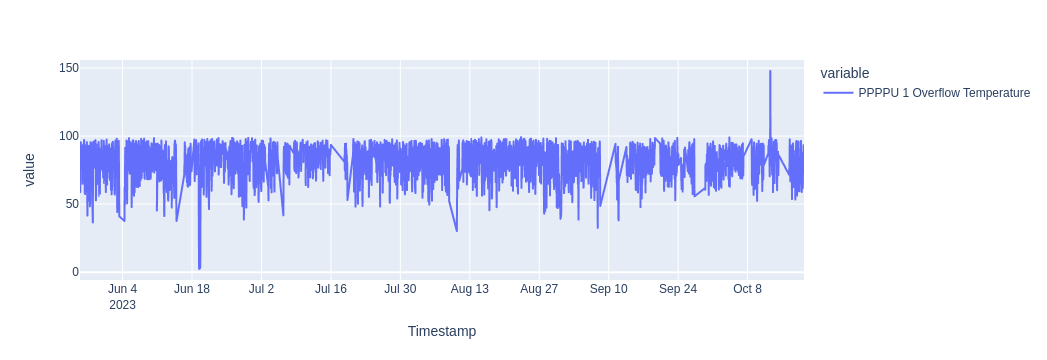

In [26]:
df_filter['PPPPU 1 Overflow Temperature'].plot()

In [27]:
df_filter.isna().sum()

( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total                   4
( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total     4
CRF                                                                      0
Colour Kitchen Steam Total                                               4
Condensate Total                                                         0
Direct Steam                                                             6
Direct(%)                                                                0
FJP Condensate Pressure                                                  0
FJP Flash Steam pressure                                                67
FJP Motive Steam Pressure                                                0
FJP Over Flow Temperature                                                0
Feed water Temp                                                          0
HRU INLET Temperature                                                    0
HRU OUTLET Temperature   

In [28]:
df_p=df_filter.copy()

# Feature Engineering

In [29]:
df_p["Condeset_temp"]=df_p['Pump1 TEMP']+df_p['Pump2 TEMP']+df_p['Pump3 TEMP']+df_p['Pump5 TEMP']
df_p["Condeset_temp"]=df_p["Condeset_temp"]/4

In [30]:
df_p["Condeset_temp"]=pd.to_numeric(df_p["Condeset_temp"], downcast='float',errors='coerce')

In [31]:
df_p["Totalizer2"]=df_p["Totalizer1"]/100

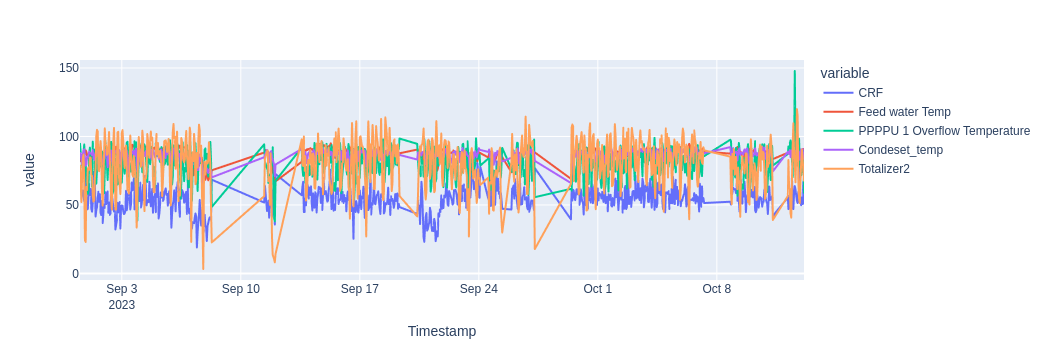

In [32]:
df_p[[ 'CRF','Feed water Temp','PPPPU 1 Overflow Temperature',"Condeset_temp",'Totalizer2']][-850:-100].plot()

In [33]:
df_com=df_p.copy()

# creating a funtion to identify the diff of each current instance value to prev value

In [34]:
def diff_fun():
    df_com['PPPPU 1 Overflow Temperature_Diff'] = df_com['PPPPU 1 Overflow Temperature'].diff()
    df_com['PPPPU 1 Overflow Temperature_Diff(%)'] = (df_com['PPPPU 1 Overflow Temperature'].diff() / 100) * 100
    mask = df_com['PPPPU 1 Overflow Temperature_Diff(%)'] > 0
    for col in ['CRF', 'Feed water Temp','Condeset_temp', 'Totalizer1']:
        df_com[f'{col}_Diff'] = df_com[col] - df_com[col].shift()
        df_com[f'{col}_Diff(%)'] = (df_com[col] - df_com[col].shift()) / df_com[col].shift()*100
    return df_com

In [35]:
#diff
diff_fun()[['PPPPU 1 Overflow Temperature_Diff','CRF_Diff','Feed water Temp_Diff','Condeset_temp_Diff','Totalizer1_Diff']].head()

PPPPU 1 Overflow Temperature_Diff   CRF_Diff  \
Timestamp                                                               
2023-05-26 10:00:59.040                                NaN        NaN   
2023-05-26 11:00:59.328                          -2.044998   6.226379   
2023-05-26 12:00:58.752                          34.149998 -13.340046   
2023-05-26 13:00:59.040                           1.224998   3.730480   
2023-05-26 14:00:59.328                           1.341667   1.767548   

                         Feed water Temp_Diff  Condeset_temp_Diff  \
Timestamp                                                           
2023-05-26 10:00:59.040                   NaN                 NaN   
2023-05-26 11:00:59.328              4.338333            3.577026   
2023-05-26 12:00:58.752              7.727295            5.411415   
2023-05-26 13:00:59.040              4.989792            2.238602   
2023-05-26 14:00:59.328              2.053543           -0.786789   

                         Totalizer1_Diff  
Timestamp                                 
2023-05-26 10:00:59.040              NaN  
2023-05-26 11:00:59.328      1519.106064  
2023-05-26 12:00:58.752      2269.869513  
2023-05-26 13:00:59.040      1206.894120  
2023-05-26 14:00:59.328     -1512.188780

In [36]:
#diff(%)
diff_fun()[['PPPPU 1 Overflow Temperature_Diff(%)','CRF_Diff(%)','Feed water Temp_Diff(%)','Condeset_temp_Diff(%)','Totalizer1_Diff(%)']].head()

PPPPU 1 Overflow Temperature_Diff(%)  CRF_Diff(%)  \
Timestamp                                                                    
2023-05-26 10:00:59.040                                   NaN          NaN   
2023-05-26 11:00:59.328                             -2.044998    10.424900   
2023-05-26 12:00:58.752                             34.149998   -20.226774   
2023-05-26 13:00:59.040                              1.224998     7.090500   
2023-05-26 14:00:59.328                              1.341667     3.137128   

                         Feed water Temp_Diff(%)  Condeset_temp_Diff(%)  \
Timestamp                                                                 
2023-05-26 10:00:59.040                      NaN                    NaN   
2023-05-26 11:00:59.328                 6.157267               4.491586   
2023-05-26 12:00:58.752                10.331012               6.502901   
2023-05-26 13:00:59.040                 6.046446               2.525874   
2023-05-26 14:00:59.328                 2.346526              -0.865884   

                         Totalizer1_Diff(%)  
Timestamp                                    
2023-05-26 10:00:59.040                 NaN  
2023-05-26 11:00:59.328           38.121925  
2023-05-26 12:00:58.752           41.240602  
2023-05-26 13:00:59.040           15.525075  
2023-05-26 14:00:59.328          -16.838147

# new columns added :  
'CRF_Diff', 'CRF_Diff(%)', 'Feed water Temp_Diff',
'Feed water Temp_Diff(%)', 'Condeset_temp_Diff',
'Condeset_temp_Diff(%)', 'Totalizer1_Diff', 'Totalizer1_Diff(%)'

In [37]:
diff_fun().columns

Index(['( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total',
       '( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total',
       'CRF', 'Colour Kitchen Steam Total', 'Condensate Total', 'Direct Steam',
       'Direct(%)', 'FJP Condensate Pressure', 'FJP Flash Steam pressure',
       'FJP Motive Steam Pressure', 'FJP Over Flow Temperature',
       'Feed water Temp', 'HRU INLET Temperature', 'HRU OUTLET Temperature',
       'Indirect Steam', 'Indirect(%)', 'Loop-1 Poly', 'Loop-2 Cotton',
       'Loop-3 (Triple Cheda)', 'PPPPU 1 Condensate Pressure',
       'PPPPU 1 Motive Pressure', 'PPPPU 1 Overflow Temperature',
       'PRS Inlet Pressure', 'Pump-3 Total', 'Pump1 TEMP', 'Pump1 Total',
       'Pump2 TEMP', 'Pump2 Total', 'Pump3 TEMP', 'Pump4 TEMP', 'Pump4 Total ',
       'Pump5 TEMP', 'Pump5 Total ', 'Steam Flow Rate',
       'Steam Header Pressure', 'Totalizer1', 'Washing Machine 1 Steam Total',
       'Washing Machine 2 Steam Total', 'Winch Steam Total', 'Condese

In [38]:
dff=diff_fun().copy()

In [134]:
dff[['PPPPU 1 Overflow Temperature_Diff','PPPPU 1 Overflow Temperature_Diff(%)']].head()

PPPPU 1 Overflow Temperature_Diff  \
Timestamp                                                    
2023-05-26 10:00:59.040                                NaN   
2023-05-26 11:00:59.328                          -2.044998   
2023-05-26 12:00:58.752                          34.149998   
2023-05-26 13:00:59.040                           1.224998   
2023-05-26 14:00:59.328                           1.341667   

                         PPPPU 1 Overflow Temperature_Diff(%)  
Timestamp                                                      
2023-05-26 10:00:59.040                                   NaN  
2023-05-26 11:00:59.328                             -2.044998  
2023-05-26 12:00:58.752                             34.149998  
2023-05-26 13:00:59.040                              1.224998  
2023-05-26 14:00:59.328                              1.341667

In [135]:
df_indNUM=dff.reset_index()

In [136]:
df_indNUM

Timestamp  \
0    2023-05-26 10:00:59.040   
1    2023-05-26 11:00:59.328   
2    2023-05-26 12:00:58.752   
3    2023-05-26 13:00:59.040   
4    2023-05-26 14:00:59.328   
...                      ...   
2839 2023-10-19 05:00:59.328   
2840 2023-10-19 06:00:58.752   
2841 2023-10-19 07:00:59.040   
2842 2023-10-19 08:00:59.328   
2843 2023-10-19 09:00:58.752   

      ( 7 Dalmia Jets + 2 Soft Flow + 2 Jigger ) Steam Total  \
0                                                   7.0        
1                                                 143.0        
2                                                 587.0        
3                                                1170.0        
4                                                1464.0        
...                                                 ...        
2839                                              884.0        
2840                                             1288.0        
2841                                             1253.0        
2842                                              772.0        
2843                                              205.0        

      ( 7 Drum + 2 Soft Flow + 2 U Jet + 7 Dalmia + 2 Jigger ) Steam Total  \
0                                                   0.0                      
1                                                   0.0                      
2                                                   0.0                      
3                                                   0.0                      
4                                                   0.0                      
...                                                 ...                      
2839                                             1891.0                      
2840                                             1842.0                      
2841                                             1662.0                      
2842                                             1113.0                      
2843                                              552.0                      

            CRF  Colour Kitchen Steam Total  Condensate Total  Direct Steam  \
0     59.726036                         0.0            2380.0        2636.0   
1     65.952415                         0.0            3630.0        2240.0   
2     52.612370                         0.0            4090.0        2193.0   
3     56.342850                         0.0            5060.0        3163.0   
4     58.110397                         0.0            4340.0        2849.0   
...         ...                         ...               ...           ...   
2839  41.542336                       210.0            2428.0        2643.0   
2840  55.644062                       208.0            4352.0        2228.0   
2841  54.783371                       205.0            3608.0        1787.0   
2842  41.328636                       193.0            1864.0        1532.0   
2843  36.028496                       123.0             964.0        1512.0   

      Direct(%)  FJP Condensate Pressure  FJP Flash Steam pressure  ...  \
0     66.150348                 0.386667                  0.003333  ...   
1     40.697911                 0.286667                  0.000000  ...   
2     28.210006                 0.376667                  0.000000  ...   
3     35.219848                 0.390000                  0.001667  ...   
4     38.146665                 0.396667                  0.000000  ...   
...         ...                      ...                       ...  ...   
2839  45.220920              1700.000000                  0.000000  ...   
2840  28.486896              1700.000000                  0.000000  ...   
2841  27.133560              1700.000000                  0.000000  ...   
2842  33.967527              1700.000000                  0.000000  ...   
2843  56.509422              1700.000000                  0.000000  ...   

      PPPPU 1 Overflow Temperature_Diff  PPPPU 1 Overflow Temperature_Diff(%) 

# finding increasing_subsequences

In [137]:
def increasing_subsequences_indices(arr):
    re=[]
    current_sequence = []
    for i in range(len(arr) - 1):
        if arr[i]<arr[i + 1]:
            current_sequence.append(i)
        else:
            current_sequence.append(i)
            if len(current_sequence) > 1:
                re.append([current_sequence[0], current_sequence[-1]])
            current_sequence = []

    if current_sequence and arr[-1] > arr[current_sequence[-1]]:
        current_sequence.append(len(arr) - 1)
        if len(current_sequence) > 1:
            re.append([current_sequence[0], current_sequence[-1]])
    return re

In [138]:
def replace_indices_with_timestamps(df, indices_list):
    result=[]
    for indices_pair in indices_list:
        start_index,end_index = indices_pair
        start_timestamp = df.index[start_index]
        end_timestamp = df.index[end_index]
        result.append([start_timestamp, end_timestamp])
    return result

In [139]:
time=replace_indices_with_timestamps(dff,increasing_subsequences_indices(dff["PPPPU 1 Overflow Temperature"]))

In [140]:
def increasing_subsequences_value(arr):
    re=[]
    diff=[]
    current_sequence=[]
    for i in range(len(arr)-1):
        if arr[i]<arr[i+1]:
            current_sequence.append(arr[i])
        else:
            current_sequence.append(arr[i])
            if len(current_sequence)>1:
                re.append(current_sequence)
            current_sequence=[]
    #print(arr[-1],arr)
    #print(current_sequence[-1],current_sequence)
    if current_sequence and arr[-1]>current_sequence[-1]:
        current_sequence.append(arr[-1])
        if len(current_sequence)>1:
            re.append(current_sequence)       
    return re

In [141]:
indices_data=increasing_subsequences_indices(dff['PPPPU 1 Overflow Temperature'])

In [142]:
value=increasing_subsequences_value(dff['PPPPU 1 Overflow Temperature'])
values=[]
for i in range(len(value)):
    diff=increasing_subsequences_value(dff['PPPPU 1 Overflow Temperature'])[i][-1]-increasing_subsequences_value(dff['PPPPU 1 Overflow Temperature'])[i][0]
    values.append([value[i][0],value[i][-1],len(increasing_subsequences_value(dff['PPPPU 1 Overflow Temperature'])[i]),diff])

In [143]:
df11 = pd.DataFrame(time, columns=['Start_Index', 'End_Index'])

In [144]:
df12 = pd.DataFrame(values, columns=['Start_Val', 'End_Val',"Count",'Diff'])

In [145]:
result = pd.concat([df11, df12], axis=1)

In [146]:
result['Percentage Difference'] = abs((result['Start_Val'] - result['End_Val']) / 100) * 100
r1=result[result['Percentage Difference']>5]
r1 = r1.reset_index(drop=True)
r1

Start_Index               End_Index  Start_Val    End_Val  \
0   2023-05-26 11:00:59.328 2023-05-26 14:00:59.328  58.751667  95.468330   
1   2023-05-26 15:00:58.752 2023-05-26 19:00:59.040  85.900002  92.273331   
2   2023-05-26 22:00:59.040 2023-05-27 01:00:59.040  64.936668  93.589996   
3   2023-05-27 03:00:58.752 2023-05-27 06:00:58.752  69.334999  97.076668   
4   2023-05-27 09:00:58.752 2023-05-27 10:00:59.040  58.273335  72.401665   
..                      ...                     ...        ...        ...   
704 2023-10-18 20:00:59.328 2023-10-18 21:00:58.752  71.766670  77.613335   
705 2023-10-18 22:00:59.040 2023-10-19 00:00:58.752  58.895000  87.333336   
706 2023-10-19 03:00:58.752 2023-10-19 05:00:59.328  61.764999  78.608330   
707 2023-10-19 06:00:58.752 2023-10-19 07:00:59.040  72.945000  93.228333   
708 2023-10-19 08:00:59.328 2023-10-19 09:00:58.752  87.228333  92.340538   

     Count       Diff  Percentage Difference  
0        4  36.716663              36.716663  
1        4   6.373329               6.373330  
2        4  28.653328              28.653326  
3        4  27.741669              27.741667  
4        2  14.128330              14.128330  
..     ...        ...                    ...  
704      2   5.846664               5.846664  
705      3  28.438335              28.438335  
706      3  16.843330              16.843330  
707      2  20.283333              20.283333  
708      2   5.112206               5.112206  

[709 rows x 7 columns]

In [147]:
sel_col = ['CRF_Diff(%)', 'Feed water Temp_Diff(%)', 'Condeset_temp_Diff(%)', 'Totalizer1_Diff(%)']

In [148]:
def get_values_between_timestamps_plot(df, start_timestamp, end_timestamp, col_name):
    mask = (df.index >= start_timestamp) & (df.index <= end_timestamp)
    values_between_timestamps = df.loc[mask, col_name]
    return values_between_timestamps.plot()

In [149]:
def get_values_between_timestamps(df, start_timestamp, end_timestamp, col_name):
    mask = (df.index >= start_timestamp) & (df.index <= end_timestamp)
    values_between_timestamps = df.loc[mask, col_name]
    return values_between_timestamps

In [150]:
def get_start_end_timestamps(df, start_timestamp, end_timestamp,sel_col):
    start_end_timestamps = df[(df.index == start_timestamp) | (df.index == end_timestamp)]
    return start_end_timestamps[sel_col]

In [151]:
get_values_between_timestamps(dff,r1['Start_Index'][55],r1['End_Index'][55],['PPPPU 1 Overflow Temperature','CRF','Feed water Temp','Condeset_temp','Totalizer2'])

PPPPU 1 Overflow Temperature        CRF  \
Timestamp                                                          
2023-06-05 14:00:59.328                     75.181664  51.840321   
2023-06-05 15:00:58.752                     83.074997  48.646343   

                         Feed water Temp  Condeset_temp  Totalizer2  
Timestamp                                                            
2023-06-05 14:00:59.328        94.365417      87.620377   88.155319  
2023-06-05 15:00:58.752        94.654373      89.907478   72.153417

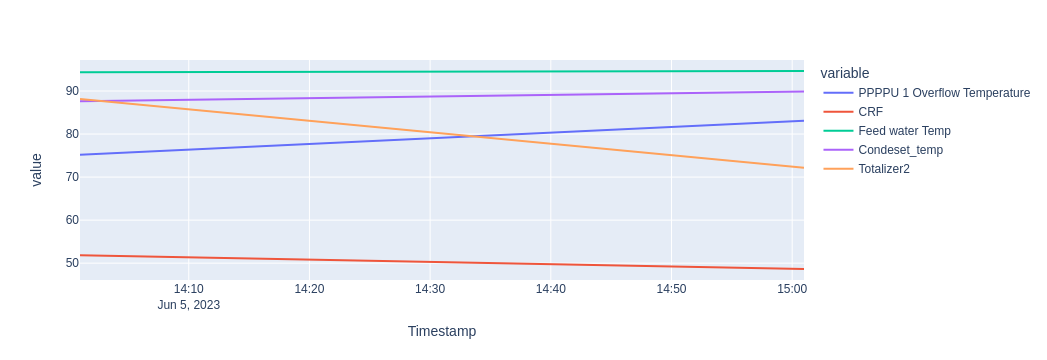

In [152]:
get_values_between_timestamps_plot(dff,r1['Start_Index'][55],r1['End_Index'][55],['PPPPU 1 Overflow Temperature','CRF','Feed water Temp','Condeset_temp','Totalizer2'])

In [153]:
def label_movement(percentage, increase_threshold, decrease_threshold):
    if percentage < decrease_threshold:
        return 'Decrease'
    elif percentage > increase_threshold:
        return 'Increase'
    else:
        return 'Flat'
    
thresholds = {
    'PPPPU 1 Overflow Temperature_Diff(%)': {'increase':2.5,'decrease':-2.5},
    'CRF%': {'increase':2.5, 'decrease': -2.5},
    'Feed water Temp%': {'increase':0.5,'decrease': -0.5},
    'Condeset_temp%':{'increase':3,'decrease': -3},
    'Totalizer1%': {'increase':5,'decrease':-5}
} 


In [154]:
result1 = pd.DataFrame(columns=['Start_Index', 'End_Index','PPPPU 1 Overflow Temperature_start','PPPPU 1 Overflow Temperature_end','PPPPU 1 Overflow Temperature_Diff(%)','CRF_start','CRF_end','CRF%','Feed water Temp_start','Feed water Temp_end','Feed water Temp%','Condeset_temp_start','Condeset_temp_end','Condeset_temp%','Totalizer1_start','Totalizer1_end','Totalizer1%','overflow%_label','crf_label','fwt_label','cond_tem_label','tot_label'])
for i in range(len(r1)):
        
    val=get_start_end_timestamps(dff,r1['Start_Index'][i],r1['End_Index'][i],['PPPPU 1 Overflow Temperature','CRF','Feed water Temp','Condeset_temp','Totalizer1'])
    direct_strat=val['PPPPU 1 Overflow Temperature'][0]
    direct_end=val['PPPPU 1 Overflow Temperature'][1]
    crf_end=val['CRF'][1]
    crf_start=val['CRF'][0]
    Feed_water_Temp_end=val['Feed water Temp'][1]
    Feed_water_Temp_start=val['Feed water Temp'][0]
    Condeset_temp_start=val['Condeset_temp'][0]
    Condeset_temp_end=val['Condeset_temp'][1]
    Totalizer1_start=val['Totalizer1'][0]
    Totalizer1_end=val['Totalizer1'][1]
    
    
    diff=get_start_end_timestamps(dff,r1['Start_Index'][i],r1['End_Index'][i],['PPPPU 1 Overflow Temperature','CRF','Feed water Temp','Condeset_temp','Totalizer1']).diff()
    diff['PPPPU 1 Overflow Temperature']=(diff['PPPPU 1 Overflow Temperature']/100)*100
    diff['Totalizer1']=(diff['Totalizer1']/12000)*100
    diff['Feed water Temp']=(diff['Feed water Temp']/100)*100
    diff['Condeset_temp']=(diff['Condeset_temp']/100)*100
    diff['CRF']=(diff['CRF']/100)*100
    
    
    start_index = diff.index[0]
    end_index = diff.index[1]
    direct=diff['PPPPU 1 Overflow Temperature'][1]
    fwt=diff['Feed water Temp'][1]
    cond_tem=diff['Condeset_temp'][1]
    CRF=diff['CRF'][1]
    tot=diff['Totalizer1'][1]
    
    overflow_label=label_movement(direct, thresholds['PPPPU 1 Overflow Temperature_Diff(%)']['increase'], thresholds['PPPPU 1 Overflow Temperature_Diff(%)']['decrease'])
    if CRF<50:
        crf_label='Decrease'
    else:
        crf_label=label_movement(CRF, thresholds['CRF%']['increase'], thresholds['CRF%']['decrease'])
    fwt_label=label_movement(fwt, thresholds['Feed water Temp%']['increase'], thresholds['Feed water Temp%']['decrease'])
    cond_tem_label=label_movement(cond_tem, thresholds['Condeset_temp%']['increase'], thresholds['Condeset_temp%']['decrease'])
    tot_label=label_movement(tot, thresholds['Totalizer1%']['increase'], thresholds['Totalizer1%']['decrease'])
    result1.loc[len(result1)]=[start_index, end_index,direct_strat,direct_end,direct,crf_start,crf_end,CRF,Feed_water_Temp_start,Feed_water_Temp_end,fwt,Condeset_temp_start,Condeset_temp_end,cond_tem,Totalizer1_start,Totalizer1_end,tot,overflow_label,crf_label,fwt_label,cond_tem_label,tot_label]
    #result1.loc[len(result1)]=[diff_df['Direct(%)'],diff_df['CRF'],diff_df['Feed water Temp'],diff_df['Totalizer1']]
result1

Start_Index               End_Index  \
0   2023-05-26 11:00:59.328 2023-05-26 14:00:59.328   
1   2023-05-26 15:00:58.752 2023-05-26 19:00:59.040   
2   2023-05-26 22:00:59.040 2023-05-27 01:00:59.040   
3   2023-05-27 03:00:58.752 2023-05-27 06:00:58.752   
4   2023-05-27 09:00:58.752 2023-05-27 10:00:59.040   
..                      ...                     ...   
704 2023-10-18 20:00:59.328 2023-10-18 21:00:58.752   
705 2023-10-18 22:00:59.040 2023-10-19 00:00:58.752   
706 2023-10-19 03:00:58.752 2023-10-19 05:00:59.328   
707 2023-10-19 06:00:58.752 2023-10-19 07:00:59.040   
708 2023-10-19 08:00:59.328 2023-10-19 09:00:58.752   

     PPPPU 1 Overflow Temperature_start  PPPPU 1 Overflow Temperature_end  \
0                             58.751667                         95.468330   
1                             85.900002                         92.273331   
2                             64.936668                         93.589996   
3                             69.334999                         97.076668   
4                             58.273335                         72.401665   
..                                  ...                               ...   
704                           71.766670                         77.613335   
705                           58.895000                         87.333336   
706                           61.764999                         78.608330   
707                           72.945000                         93.228333   
708                           87.228333                         92.340538   

     PPPPU 1 Overflow Temperature_Diff(%)  CRF_start    CRF_end       CRF%  \
0                               36.716663  65.952415  58.110397  -7.842019   
1                                6.373330  57.030415  50.685886  -6.344529   
2                               28.653326  44.702644  62.220215  17.517570   
3                               27.741667  48.989941  58.254967   9.265026   
4                               14.128330  28.337425  52.809334  24.471909   
..                                    ...        ...        ...        ...   
704                              5.846664  62.810398  70.221596   7.411198   
705                             28.438335  69.785797  60.635826  -9.149971   
706                             16.843330  55.934818  41.542336 -14.392483   
707                             20.283333  55.644062  54.783371  -0.860691   
708                              5.112206  41.328636  36.028496  -5.300140   

     Feed water Temp_start  Feed water Temp_end  ...  Condeset_temp_end  \
0                74.797081            89.567711  ...          90.078629   
1                91.498749            91.189377  ...          85.126038   
2                90.879997            88.490417  ...          89.698883   
3                87.259163            89.961044  ...          91.182976   
4                89.276878            89.716873  ...          88.962654   
..                     ...                  ...  ...                ...   
704              90.625420            90.284164  ...          82.328018   
705              89.794586            85.377914  ...          88.088074   
706              90.693336            90.155418  ...          84.474648   
707              88.916458            88.502914  ...          85.685951   
708              87.718750            86.631577  ...          78.248474   

     Condeset_temp%  Totalizer1_start  Totalizer1_end  Totalizer1%  \
0          6.863227       5503.967944     7468.542797    16.371457   
1         -5.033104       6908.594419     6510.688189    -3.315885   
2          5.776833       4854.299054     8598.491815    31.201606   
3          3.029961       7491.333811     7964.985963     3.947101   
4          2.709221       4728.728773     5605.069842     7.302842   
..              ...               ...             ...          ...   
704       -4.630478       4890.910000     6020.940000     9.416917   
705        8.907372       4992.4

In [155]:
a=result1[['tot_label','crf_label','fwt_label','cond_tem_label']].value_counts()

In [156]:
a_df=a.reset_index()
a_df.columns=['tot_label','crf_label','fwt_label','cond_tem_label', 'count']
a_df.fillna(method='ffill', inplace=True)
print(a_df)

   tot_label crf_label fwt_label cond_tem_label  count
0   Decrease  Decrease  Increase           Flat     88
1   Increase  Decrease  Decrease       Increase     88
2   Increase  Decrease  Increase       Increase     66
3   Increase  Decrease  Decrease           Flat     54
4   Decrease  Decrease  Decrease           Flat     53
5       Flat  Decrease  Decrease           Flat     40
6       Flat  Decrease  Increase           Flat     37
7   Decrease  Decrease      Flat           Flat     30
8   Decrease  Decrease  Increase       Increase     30
9   Increase  Decrease  Increase           Flat     29
10      Flat  Decrease  Decrease       Increase     29
11      Flat  Decrease  Increase       Increase     29
12  Decrease  Decrease  Increase       Decrease     23
13  Increase  Decrease      Flat       Increase     18
14  Decrease  Decrease  Decrease       Increase     15
15      Flat  Decrease      Flat           Flat     14
16  Increase  Decrease      Flat           Flat     13
17  Decrea

In [157]:
#tot=['Start_Index', 'End_Index','Totalizer1_start','Totalizer1_end','Totalizer1%']

In [158]:
def find_freq(result_df, tot_label, crf_label, fwt_label, cond_tem_label):
    query=f"(result_df['tot_label']=='{tot_label}') & "
    query+=f"(result_df['crf_label']=='{crf_label}') & "
    query+=f"(result_df['fwt_label']=='{fwt_label}') & "
    query+=f"(result_df['cond_tem_label']=='{cond_tem_label}')"
    return result_df[eval(query)]
cases=find_freq(result1, 'Flat','Decrease','Decrease','Flat')
cases

Start_Index               End_Index  \
10  2023-05-28 06:00:58.752 2023-05-28 07:00:59.040   
12  2023-05-28 16:00:59.040 2023-05-28 19:00:59.040   
24  2023-05-30 17:00:59.328 2023-05-30 18:00:58.752   
40  2023-06-02 00:00:58.752 2023-06-02 01:00:59.040   
62  2023-06-06 13:00:59.040 2023-06-06 14:00:59.328   
71  2023-06-07 23:00:59.328 2023-06-08 02:00:59.328   
85  2023-06-10 05:00:59.328 2023-06-10 08:00:59.328   
86  2023-06-10 09:00:58.752 2023-06-10 10:00:59.040   
135 2023-06-20 13:00:59.040 2023-06-20 14:00:59.328   
145 2023-06-22 03:00:58.752 2023-06-22 05:00:59.328   
150 2023-06-22 23:00:59.328 2023-06-23 01:00:59.040   
151 2023-06-23 03:00:58.752 2023-06-23 04:00:59.040   
212 2023-07-05 03:00:58.752 2023-07-05 05:00:59.328   
218 2023-07-07 11:00:59.328 2023-07-07 14:00:59.328   
224 2023-07-09 00:00:58.752 2023-07-09 01:00:59.040   
245 2023-07-12 12:00:58.752 2023-07-12 14:00:59.328   
254 2023-07-13 23:00:59.328 2023-07-14 00:00:58.752   
270 2023-07-19 02:00:59.328 2023-07-19 03:00:58.752   
302 2023-07-25 12:00:58.752 2023-07-25 14:00:59.328   
307 2023-07-26 16:00:59.040 2023-07-26 18:00:58.752   
315 2023-07-28 00:00:58.752 2023-07-28 01:00:59.040   
329 2023-07-30 04:00:59.040 2023-07-30 06:00:58.752   
337 2023-07-31 13:00:59.040 2023-07-31 14:00:59.328   
340 2023-08-01 03:00:58.752 2023-08-01 06:00:58.752   
346 2023-08-02 10:00:59.040 2023-08-02 14:00:59.328   
409 2023-08-15 16:59:59.712 2023-08-15 18:00:00.000   
437 2023-08-20 12:00:00.000 2023-08-20 13:00:00.288   
441 2023-08-21 04:00:00.288 2023-08-21 04:59:59.712   
499 2023-08-31 04:00:00.288 2023-08-31 04:59:59.712   
541 2023-09-11 15:00:58.752 2023-09-11 16:00:59.040   
556 2023-09-15 07:00:59.040 2023-09-15 08:00:59.328   
580 2023-09-19 05:00:59.328 2023-09-19 06:00:58.752   
590 2023-09-22 03:00:58.752 2023-09-22 06:00:58.752   
595 2023-09-23 05:01:00.192 2023-09-23 06:00:59.616   
600 2023-09-24 02:01:00.192 2023-09-24 13:27:00.288   
608 2023-09-26 11:00:59.328 2023-09-26 14:00:59.328   
616 2023-09-29 23:00:59.328 2023-09-30 02:00:59.328   
641 2023-10-03 23:00:59.328 2023-10-04 00:00:58.752   
686 2023-10-13 15:00:58.752 2023-10-13 19:00:59.040   
694 2023-10-17 01:00:59.040 2023-10-17 04:00:59.040   

     PPPPU 1 Overflow Temperature_start  PPPPU 1 Overflow Temperature_end  \
10                            52.573334                         77.626663   
12                            78.703331                         94.678337   
24                            79.233330                         96.916664   
40                            79.636665                         95.796669   
62                            87.744896                         93.109619   
71                            84.574997                         96.387276   
85                            87.968330                         98.434998   
86                            73.163330                         85.570000   
135                           84.648331                         93.135002   
145                           70.839996                         92.101669   
150                           82.998337                         97.451668   
151                           78.198334                         85.376663   
212                           72.616669                         95.346664   
218                           69.901665                         87.681664   
224                           72.811668                         83.058334   
245                           86.641670                         94.093330   
254                           75.763336                         95.038330   
270                           83.315002                         89.623337   
302                           75.047455                         93.721664   
307                           82.415001                         92.410004   
315                           70.993332                         82.916664   
329                           64.436668                         89

In [159]:
#goto 
goto=result1[(result1['tot_label']=='Flat') & (result1['fwt_label']=='Decrease')&(result1['cond_tem_label']=='Flat')&(result1['crf_label']=='Decrease')]
goto 

Start_Index               End_Index  \
10  2023-05-28 06:00:58.752 2023-05-28 07:00:59.040   
12  2023-05-28 16:00:59.040 2023-05-28 19:00:59.040   
24  2023-05-30 17:00:59.328 2023-05-30 18:00:58.752   
40  2023-06-02 00:00:58.752 2023-06-02 01:00:59.040   
62  2023-06-06 13:00:59.040 2023-06-06 14:00:59.328   
71  2023-06-07 23:00:59.328 2023-06-08 02:00:59.328   
85  2023-06-10 05:00:59.328 2023-06-10 08:00:59.328   
86  2023-06-10 09:00:58.752 2023-06-10 10:00:59.040   
135 2023-06-20 13:00:59.040 2023-06-20 14:00:59.328   
145 2023-06-22 03:00:58.752 2023-06-22 05:00:59.328   
150 2023-06-22 23:00:59.328 2023-06-23 01:00:59.040   
151 2023-06-23 03:00:58.752 2023-06-23 04:00:59.040   
212 2023-07-05 03:00:58.752 2023-07-05 05:00:59.328   
218 2023-07-07 11:00:59.328 2023-07-07 14:00:59.328   
224 2023-07-09 00:00:58.752 2023-07-09 01:00:59.040   
245 2023-07-12 12:00:58.752 2023-07-12 14:00:59.328   
254 2023-07-13 23:00:59.328 2023-07-14 00:00:58.752   
270 2023-07-19 02:00:59.328 2023-07-19 03:00:58.752   
302 2023-07-25 12:00:58.752 2023-07-25 14:00:59.328   
307 2023-07-26 16:00:59.040 2023-07-26 18:00:58.752   
315 2023-07-28 00:00:58.752 2023-07-28 01:00:59.040   
329 2023-07-30 04:00:59.040 2023-07-30 06:00:58.752   
337 2023-07-31 13:00:59.040 2023-07-31 14:00:59.328   
340 2023-08-01 03:00:58.752 2023-08-01 06:00:58.752   
346 2023-08-02 10:00:59.040 2023-08-02 14:00:59.328   
409 2023-08-15 16:59:59.712 2023-08-15 18:00:00.000   
437 2023-08-20 12:00:00.000 2023-08-20 13:00:00.288   
441 2023-08-21 04:00:00.288 2023-08-21 04:59:59.712   
499 2023-08-31 04:00:00.288 2023-08-31 04:59:59.712   
541 2023-09-11 15:00:58.752 2023-09-11 16:00:59.040   
556 2023-09-15 07:00:59.040 2023-09-15 08:00:59.328   
580 2023-09-19 05:00:59.328 2023-09-19 06:00:58.752   
590 2023-09-22 03:00:58.752 2023-09-22 06:00:58.752   
595 2023-09-23 05:01:00.192 2023-09-23 06:00:59.616   
600 2023-09-24 02:01:00.192 2023-09-24 13:27:00.288   
608 2023-09-26 11:00:59.328 2023-09-26 14:00:59.328   
616 2023-09-29 23:00:59.328 2023-09-30 02:00:59.328   
641 2023-10-03 23:00:59.328 2023-10-04 00:00:58.752   
686 2023-10-13 15:00:58.752 2023-10-13 19:00:59.040   
694 2023-10-17 01:00:59.040 2023-10-17 04:00:59.040   

     PPPPU 1 Overflow Temperature_start  PPPPU 1 Overflow Temperature_end  \
10                            52.573334                         77.626663   
12                            78.703331                         94.678337   
24                            79.233330                         96.916664   
40                            79.636665                         95.796669   
62                            87.744896                         93.109619   
71                            84.574997                         96.387276   
85                            87.968330                         98.434998   
86                            73.163330                         85.570000   
135                           84.648331                         93.135002   
145                           70.839996                         92.101669   
150                           82.998337                         97.451668   
151                           78.198334                         85.376663   
212                           72.616669                         95.346664   
218                           69.901665                         87.681664   
224                           72.811668                         83.058334   
245                           86.641670                         94.093330   
254                           75.763336                         95.038330   
270                           83.315002                         89.623337   
302                           75.047455                         93.721664   
307                           82.415001                         92.410004   
315                           70.993332                         82.916664   
329                           64.436668                         89

In [160]:
count_above_5 = (dff['PPPPU 1 Overflow Temperature'] > 5).sum()
count_less_5 = (dff['CRF_Diff'] < 5).sum()
print(count_above_5,count_less_5)

2837 1967


In [161]:
col_name=['CRF','Feed water Temp','Condeset_temp','Totalizer1']

In [163]:
#for i in range(len(result)):
    #print(get_values_between_timestamps(dff,result['Start_Index'][i],result['End_Index'][i],['CRF','Feed water Temp','Totalizer1','Condeset_temp']))
    #print(increasing_subsequences_value(get_values_between_timestamps(dff,result['Start_Index'][i],result['End_Index'][i],'CRF')))
    #print(decreasing_subsequences_value(get_values_between_timestamps(dff,result['Start_Index'][i],result['End_Index'][i],'CRF')))

pattern_values = []
for i in range(len(values)):
    if percentage_diff > 5:
        pattern = 1
    elif percentage_diff < -5:
        pattern = -1
    else:
        pattern = 0

    pattern_values.extend([pattern] * length)

result['Pattern'] = 0
result.loc[dff.index.isin(pattern_values), 'Pattern'] = 1
result.loc[dff.index.isin(pattern_values), 'Pattern'] = -1
print(result)

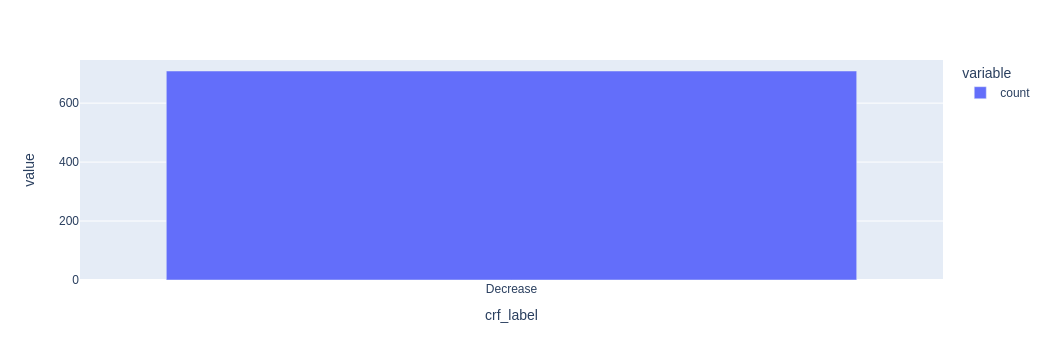

In [165]:
result1['crf_label'].value_counts().plot(kind='bar')

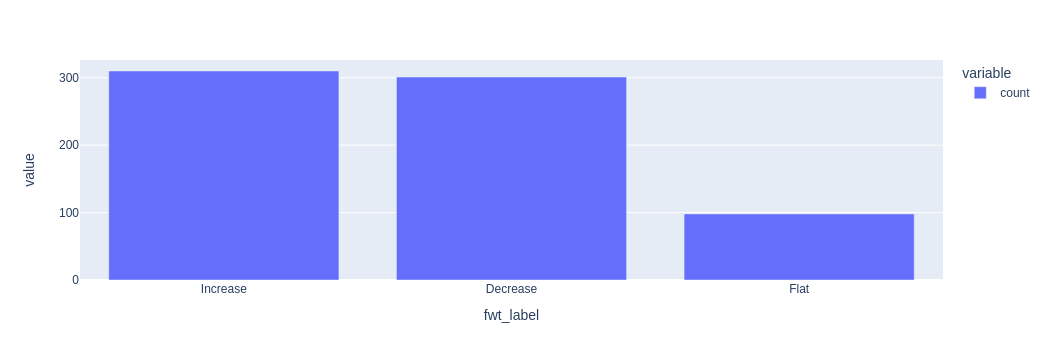

In [168]:
result1['fwt_label'].value_counts().plot(kind='bar')

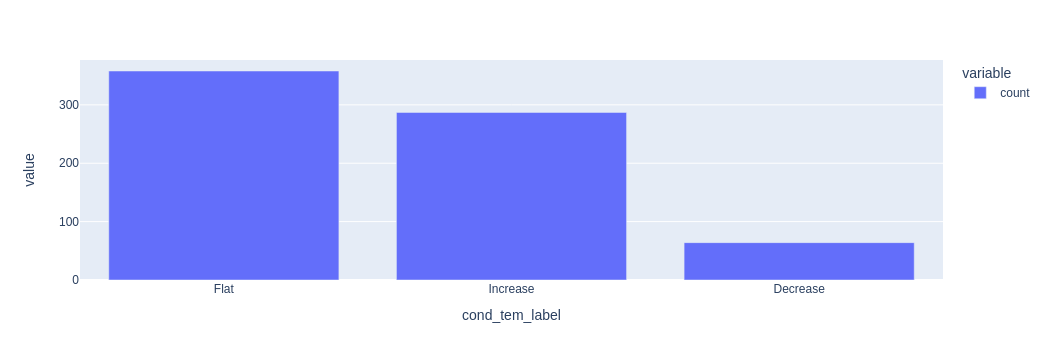

In [170]:
result1['cond_tem_label'].value_counts().plot(kind='bar')

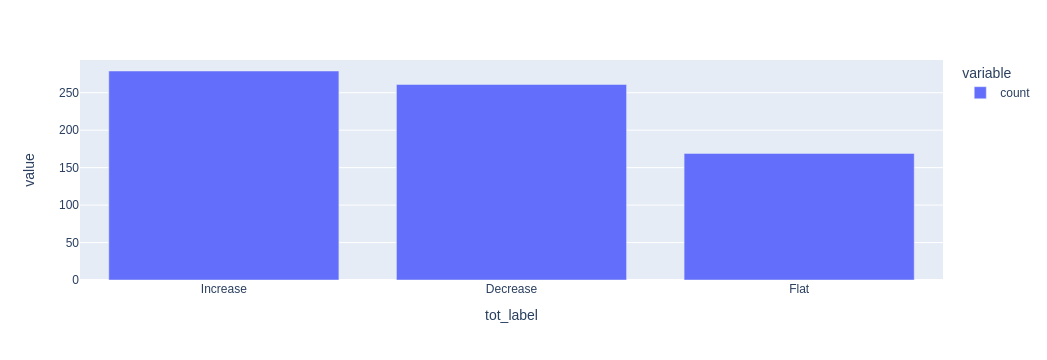

In [171]:
result1['tot_label'].value_counts().plot(kind='bar')

In [172]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances

In [173]:
df_selected=result1[['tot_label','crf_label','fwt_label','cond_tem_label']]
label_mapping = {'Decrease': -1, 'Flat': 0, 'Increase': 1}
df_selected = result1[['tot_label', 'crf_label', 'fwt_label', 'cond_tem_label']]
df_selected.replace(label_mapping, inplace=True)

/tmp/ipykernel_70323/1180570758.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
similarity_matrix = 1 - pairwise_distances(df_selected, metric='cosine')

In [175]:
similarity_df = pd.DataFrame(similarity_matrix, index=df_selected.index, columns=df_selected.index)

df_selected1=df_selected[df_selected.duplicated(['Direct%_Diff_pattern','CRF_Diff(%)_pattern','Feed water Temp_Diff(%)_pattern','Condeset_temp_Diff(%)_pattern','Totalizer2_Diff(%)_pattern'])]

In [176]:
similarity_df

0         1         2         3         4         5         6    \
0    1.000000  0.000000  0.500000  0.866025  0.707107  0.866025  0.288675   
1    0.000000  1.000000  0.000000  0.000000  0.500000  0.000000  0.408248   
2    0.500000  0.000000  1.000000  0.288675  0.707107  0.866025  0.866025   
3    0.866025  0.000000  0.288675  1.000000  0.408248  0.666667  0.000000   
4    0.707107  0.500000  0.707107  0.408248  1.000000  0.816497  0.816497   
..        ...       ...       ...       ...       ...       ...       ...   
704  0.288675  0.816497  0.288675  0.000000  0.816497  0.333333  0.666667   
705  0.500000  0.000000  1.000000  0.288675  0.707107  0.866025  0.866025   
706 -0.288675  0.408248  0.288675  0.000000  0.000000  0.000000  0.333333   
707  0.000000  0.500000  0.000000  0.408248  0.000000  0.000000  0.000000   
708 -0.500000  0.707107  0.000000 -0.288675  0.000000 -0.288675  0.288675   

          7         8         9    ...       699       700       701  \
0    0.288675  0.500000  1.000000  ...  0.866025  0.866025 -0.288675   
1    0.408248  0.000000  0.000000  ...  0.408248  0.000000  0.816497   
2   -0.288675  1.000000  0.500000  ...  0.288675  0.288675  0.288675   
3    0.666667  0.288675  0.866025  ...  0.666667  1.000000 -0.333333   
4    0.000000  0.707107  0.707107  ...  0.816497  0.408248  0.408248   
..        ...       ...       ...  ...       ...       ...       ...   
704  0.000000  0.288675  0.288675  ...  0.666667  0.000000  0.666667   
705 -0.288675  1.000000  0.500000  ...  0.288675  0.288675  0.288675   
706  0.333333  0.288675 -0.288675  ... -0.333333  0.000000  0.666667   
707  0.816497  0.000000  0.000000  ...  0.000000  0.408248  0.408248   
708  0.288675  0.000000 -0.500000  ... -0.288675 -0.288675  0.866025   

          702       703       704       705       706       707       708  
0    0.500000  0.866025  0.288675  0.500000 -0.288675  0.000000 -0.500000  
1    0.000000  0.000000  0.816497  0.000000  0.408248  0.500000  0.707107  
2    1.000000  0.288675  0.288675  1.000000  0.288675  0.000000  0.000000  
3    0.288675  1.000000  0.000000  0.288675  0.000000  0.408248 -0.288675  
4    0.707107  0.408248  0.816497  0.707107  0.000000  0.000000  0.000000  
..        ...       ...       ...       ...       ...       ...       ...  
704  0.288675  0.000000  1.000000  0.288675  0.000000  0.000000  0.288675  
705  1.000000  0.288675  0.288675  1.000000  0.288675  0.000000  0.000000  
706  0.288675  0.000000  0.000000  0.288675  1.000000  0.816497  0.866025  
707  0.000000  0.408248  0.000000  0.000000  0.816497  1.000000  0.707107  
708  0.000000 -0.288675  0.288675  0.000000  0.866025  0.707107  1.000000  

[709 rows x 709 columns]